# LGBM & XGBM

### Exploratory Data Analysis (EDA): 
##### 1. Load the Titanic dataset using Python's pandas library. 
##### 2. Check for missing values. 
##### 3. Explore data distributions using histograms and box plots. 
##### 4. Visualize relationships between features and survival using scatter plots and bar plots.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print("\n--- Dataset Information ---")
print(df.info())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### Display first few rows

In [6]:
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### 3. Check for Missing Values

In [7]:
print("\n--- Missing Values in Each Column ---")
print(df.isnull().sum())


--- Missing Values in Each Column ---
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


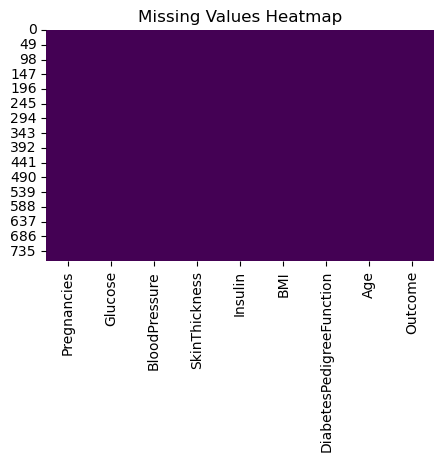

In [8]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


## 4. Explore Data Distributions 
#### Separate numerical and categorical columns

In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

#### Histograms for numerical features

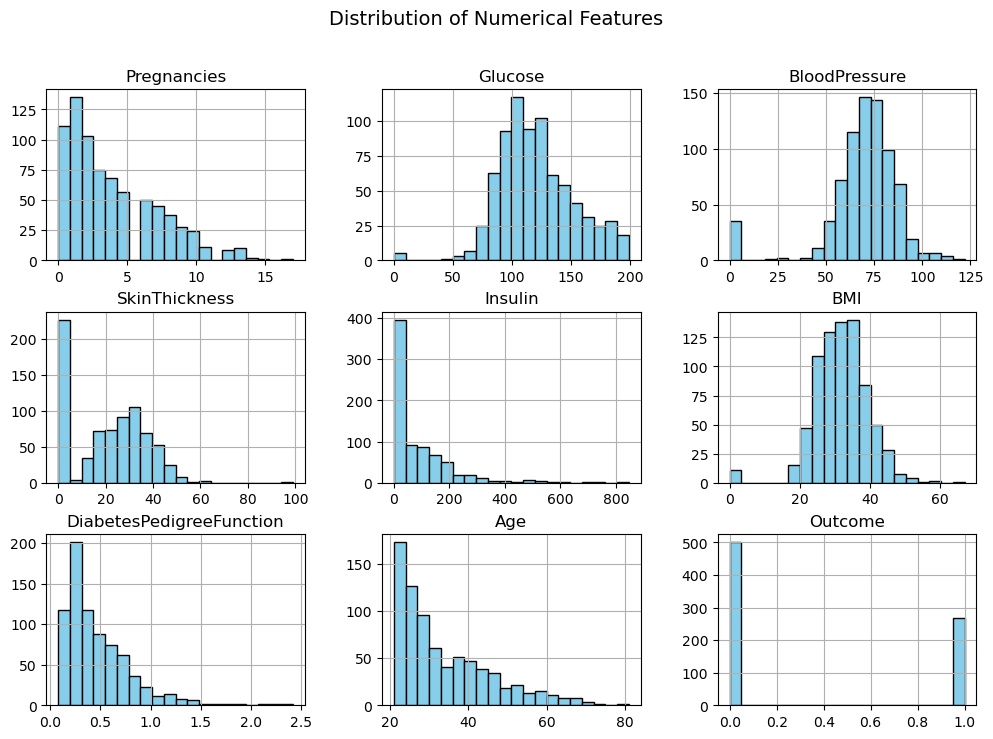

In [10]:
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

#### Box plots to check outliers

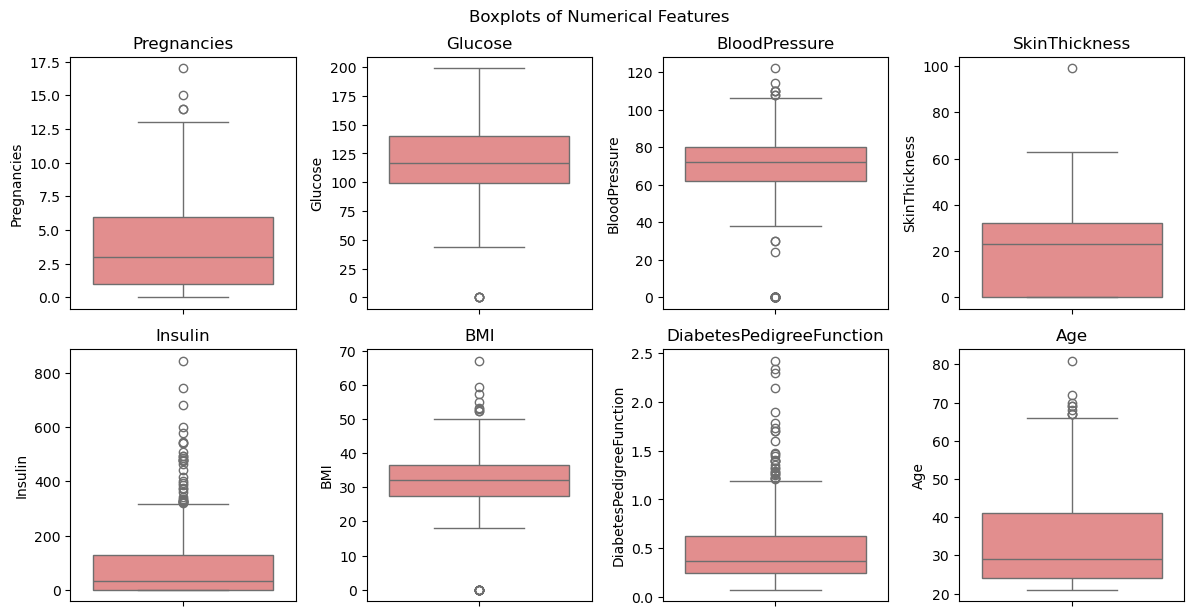

In [11]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols[:8], 1):  # Limit to 8 for readability
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

#### 5. Visualize Relationships Between Features and Target 

In [10]:
target_col = None
for col in df.columns:
    if col.lower() in ['outcome', 'diabetes', 'class', 'target']:
        target_col = col
        break

if target_col:
    print(f"\nDetected target column: {target_col}")


Detected target column: Outcome


### Target count

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df, palette='Set2')
plt.title(f'Distribution of Target Variable ({target_col})')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.show()

NameError: name 'target_col' is not defined

<Figure size 600x400 with 0 Axes>

 #### Correlation heatmap

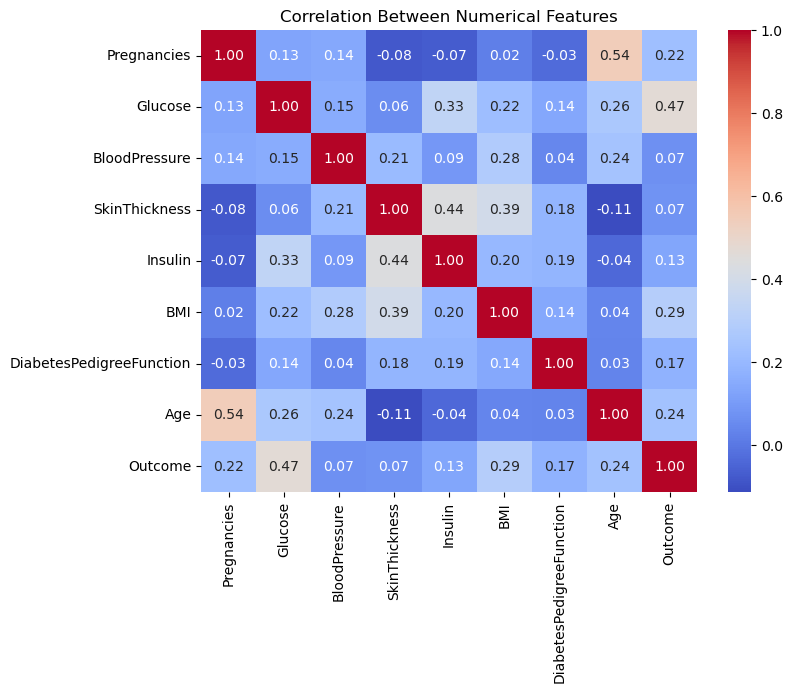

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()

#### Relationship examples

In [14]:
if 'Age' in df.columns and 'BMI' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='Age', y='BMI', hue=target_col, data=df, palette='coolwarm')
    plt.title('Age vs BMI by Outcome')
    plt.show()

else:
    print("\nNo target column detected. Skipping survival/outcome-based plots.")


NameError: name 'target_col' is not defined

<Figure size 600x400 with 0 Axes>

#### 6. Summary Statistics

In [14]:
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min    

#  Data Preprocessing:

#### 1.	Impute missing values.
#### 2.	Encode categorical variables using one-hot encoding or label encoding. 
#### 3.	If needed you can apply more preprocessing methods on the given dataset.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # FIXED: Added StandardScaler

### 1.	Impute missing values.

In [16]:
# Check for missing values
if df.isnull().sum().sum() == 0:
    print("\n No missing values found.")
else:
    print("\n Missing values detected. Imputing...")
    for col in df.columns:
        if df[col].dtype == 'object':
            # Fill categorical missing values with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            # Fill numeric missing values with median
            df[col].fillna(df[col].median(), inplace=True)


 No missing values found.


In [17]:
print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Detect categorical columns

In [18]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

#### 2.	Encode categorical variables using one-hot encoding or label encoding. 

In [19]:
if len(cat_cols) > 0:
    print("\nCategorical columns detected:", cat_cols)

    # Apply Label Encoding for binary categories
    le = LabelEncoder()
    for col in cat_cols:
        if df[col].nunique() == 2:
            df[col] = le.fit_transform(df[col])
        else:
            # Apply One-Hot Encoding for multi-class columns
            df = pd.get_dummies(df, columns=[col], drop_first=True)

    print("\nEncoding complete.")
else:
    print("\n No categorical columns detected — skipping encoding.")


 No categorical columns detected — skipping encoding.


In [20]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [21]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outlier_count > 0:
        print(f" {outlier_count} potential outliers in {col}")
        # Optional: Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))

 4 potential outliers in Pregnancies
 5 potential outliers in Glucose
 45 potential outliers in BloodPressure
 1 potential outliers in SkinThickness
 34 potential outliers in Insulin
 19 potential outliers in BMI
 29 potential outliers in DiabetesPedigreeFunction
 9 potential outliers in Age


#### (B) Feature Scaling (optional, helps with gradient boosting models)

In [22]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [18]:
print("\n Numerical features scaled.")
print("\n--- Preprocessed Data Preview ---")
print(df.head())


 Numerical features scaled.

--- Preprocessed Data Preview ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Building Predictive Models:

#### 1.	Split the preprocessed dataset into training and testing sets.
#### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
#### 3.	Build predictive models using LightGBM and XGBoost algorithms.
#### 4.	Train the models on the training set and evaluate their performance on the testing set.
#### 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [42]:
#pip install lightgbm xgboost
import lightgbm as lgb
import xgboost as xgb

##### Detect target column automatically

In [43]:
target_col = None
for col in df.columns:
    if col.lower() in ['outcome', 'diabetes', 'class', 'target']:
        target_col = col
        break

if not target_col:
    raise ValueError(" Could not detect target column automatically. Please set target_col manually.")

print(f" Detected target column: {target_col}")

 Detected target column: Outcome


In [44]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n Data split completed:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")


 Data split completed:
Training samples: 614
Testing samples:  154


#### Ensure target column is binary (integer)

In [46]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [47]:
y = y.astype(int)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

C:\Users\hanum\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hanum\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\hanum\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hanum\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=42)

#### Predictions

In [50]:
y_pred_lgb = lgb_model.predict(X_test)

##### Evaluation

In [51]:
print("\n===== LightGBM Model Performance =====")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_lgb):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


===== LightGBM Model Performance =====
Accuracy:  0.7468
Precision: 0.6531
Recall:    0.5926
F1 Score:  0.6214

Confusion Matrix:
 [[83 17]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



#### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [52]:
print("\n===== LightGBM Model Performance =====")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_lgb):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


===== LightGBM Model Performance =====
Accuracy:  0.7468
Precision: 0.6531
Recall:    0.5926
F1 Score:  0.6214

Confusion Matrix:
 [[83 17]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



#### 3.	Build predictive models using LightGBM and XGBoost algorithms.

In [53]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\hanum\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:45:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
y_pred_xgb = xgb_model.predict(X_test)

In [55]:
print("\n===== XGBoost Model Performance =====")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_xgb):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


===== XGBoost Model Performance =====
Accuracy:  0.7338
Precision: 0.6226
Recall:    0.6111
F1 Score:  0.6168

Confusion Matrix:
 [[80 20]
 [21 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



#### 4.	Train the models on the training set and evaluate their performance on the testing set.
### Cross-Validation

In [56]:
lgb_cv = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy').mean()
xgb_cv = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy').mean()

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\hanum\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:45:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hanum\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:45:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hanum\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:45:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hanum\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:45:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

In [41]:
print("\n===== Cross-Validation Results =====")
print(f"LightGBM Average CV Accuracy: {lgb_cv:.4f}")
print(f"XGBoost  Average CV Accuracy: {xgb_cv:.4f}")


===== Cross-Validation Results =====
LightGBM Average CV Accuracy: 0.7474
XGBoost  Average CV Accuracy: 0.7383


### Hyperparameter Tuning (Example for LightGBM)

In [42]:
param_grid_lgb = {
    'num_leaves': [15, 31, 50],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200]
}

In [43]:
grid_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lgb.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,estimator,LGBMClassifie...ndom_state=42)
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [-1, 5, ...], 'n_estimators': [100, 200], 'num_leaves': [15, 31, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


#### Hyperparameter Tuning (Example for XGBoost)

In [57]:
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

In [58]:
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\hanum\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:46:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [59]:
print("\nBest Parameters for XGBoost:", grid_xgb.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_xgb.best_score_:.4f}")


Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validated Accuracy: 0.7672


#### 5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [60]:
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_lgb), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_xgb)],
    'F1-Score': [f1_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_xgb)],
    'CV_Accuracy': [lgb_cv, xgb_cv]
})

In [61]:
print("\n===== Comparative Performance Summary =====")
print(results)


===== Comparative Performance Summary =====
      Model  Accuracy  Precision    Recall  F1-Score  CV_Accuracy
0  LightGBM  0.746753   0.653061  0.592593  0.621359     0.747449
1   XGBoost  0.733766   0.622642  0.611111  0.616822     0.740956


### Comparative Analysis:
#### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
#### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##### 1.Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [64]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': [
        accuracy_score(y_test, y_pred_lgb),
        precision_score(y_test, y_pred_lgb),
        recall_score(y_test, y_pred_lgb),
        f1_score(y_test, y_pred_lgb)
    ],
    'XGBoost': [
        accuracy_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb)
    ]
})

In [65]:
print("\n===== Comparative Performance Metrics =====")
print(results)


===== Comparative Performance Metrics =====
      Metric  LightGBM   XGBoost
0   Accuracy  0.746753  0.733766
1  Precision  0.653061  0.622642
2     Recall  0.592593  0.611111
3   F1-Score  0.621359  0.616822


### 2.Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
#### Visualize the Comparison

In [66]:
plt.figure(figsize=(8, 5))
x = np.arange(len(results['Metric']))
width = 0.35

<Figure size 800x500 with 0 Axes>

<BarContainer object of 4 artists>

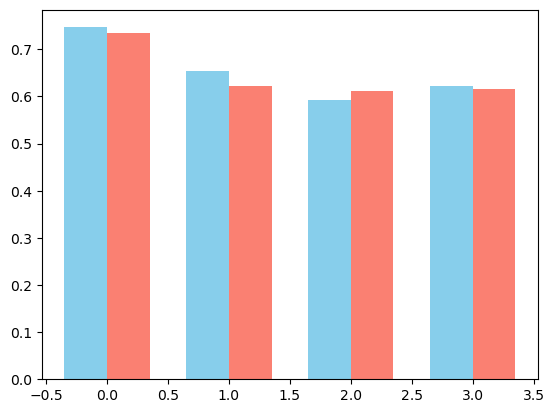

In [67]:
plt.bar(x - width/2, results['LightGBM'], width, label='LightGBM', color='skyblue')
plt.bar(x + width/2, results['XGBoost'], width, label='XGBoost', color='salmon')

C:\Users\hanum\AppData\Local\Temp\ipykernel_6752\3744529916.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


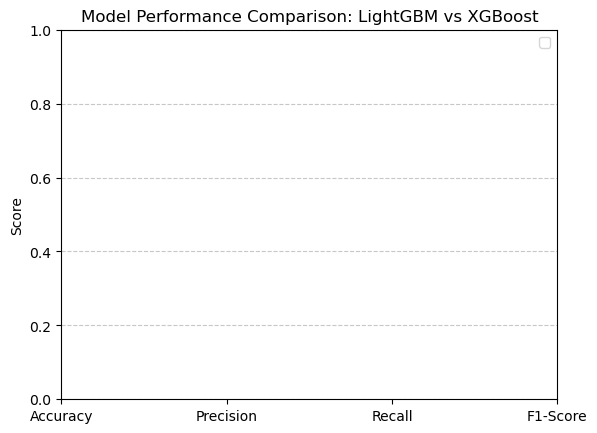

In [68]:
plt.xticks(x, results['Metric'])
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Performance Comparison: LightGBM vs XGBoost')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Interpretation 

In [69]:
best_model = (
    "LightGBM" if results['LightGBM'].mean() > results['XGBoost'].mean() else "XGBoost"
)
print(f"\n Based on average metric scores, the better performing model is: **{best_model}**")


 Based on average metric scores, the better performing model is: **LightGBM**


####  Display metric differences

In [70]:
results['Difference (LGBM - XGB)'] = results['LightGBM'] - results['XGBoost']
print("\n===== Metric Differences =====")
print(results)


===== Metric Differences =====
      Metric  LightGBM   XGBoost  Difference (LGBM - XGB)
0   Accuracy  0.746753  0.733766                 0.012987
1  Precision  0.653061  0.622642                 0.030420
2     Recall  0.592593  0.611111                -0.018519
3   F1-Score  0.621359  0.616822                 0.004537
